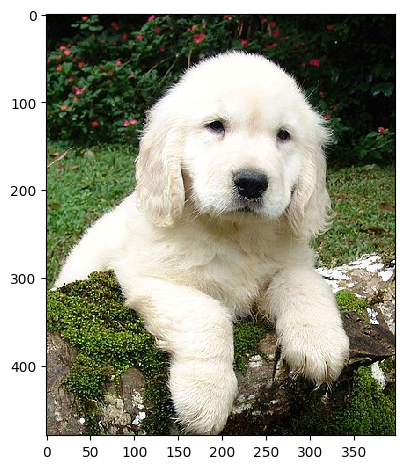

In [4]:
from skimage import io
img = io.imread('./puppy.jpg')
io.imshow(img)

In [5]:
#Getting Image Resolution
from skimage import io
img = io.imread('puppy.jpg')
img.shape

(480, 398, 3)

In [6]:
#Getting Pixel Values
from skimage import io
import pandas as pd
img = io.imread('puppy.jpg')
df = pd.DataFrame(img.flatten())
filepath = 'pixel_values1.xlsx'
df.to_excel(filepath, index=False)

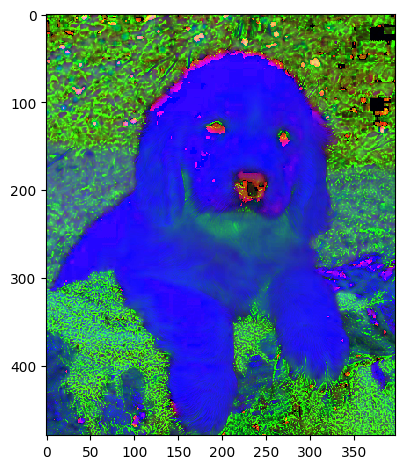

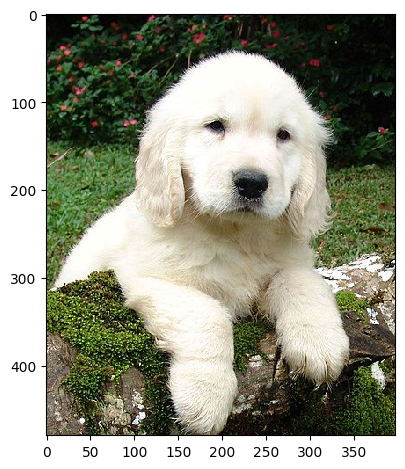

In [7]:
#Import libraries
from skimage import io
from skimage import color
from skimage import data
from pylab import *
#Read image
img = io.imread('puppy.jpg')
#Convert to HSV
img_hsv = color.rgb2hsv(img)
#Convert back to RGB
img_rgb = color.hsv2rgb(img_hsv)
#Show both figures
figure(0)
io.imshow(img_hsv)
figure(1)
io.imshow(img_rgb)

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


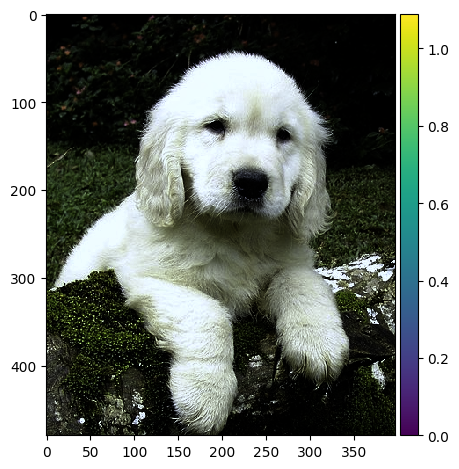

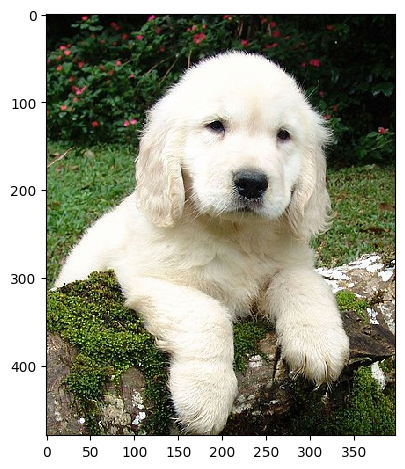

In [8]:
#Import libraries
from skimage import io
from skimage import color
from skimage import data
#Read image
img = io.imread('puppy.jpg')
#Convert to XYZ
img_xyz = color.rgb2xyz(img)
#Convert back to RGB
img_rgb = color.xyz2rgb(img_xyz)
#Show both figures
figure(0)
io.imshow(img_xyz)
figure(1)
io.imshow(img_rgb)

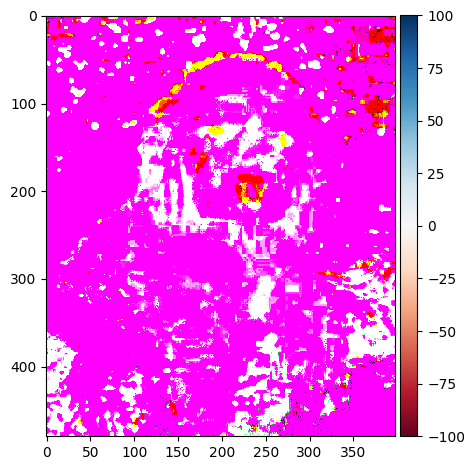

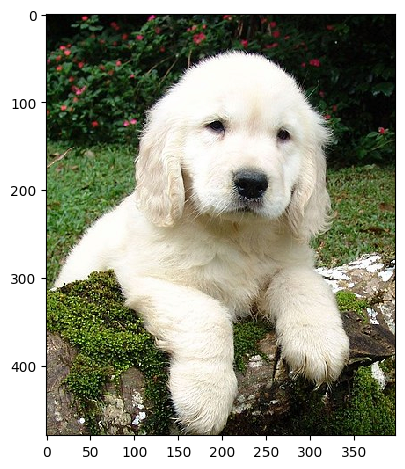

In [9]:
#Import libraries
from skimage import io
from skimage import color
#Read image
img = io.imread('puppy.jpg')
#Convert to LAB
img_lab = color.rgb2lab(img)
#Convert back to RGB
img_rgb = color.lab2rgb(img_lab)
#Show both figures
figure(0)
io.imshow(img_lab)
figure(1)
io.imshow(img_rgb)

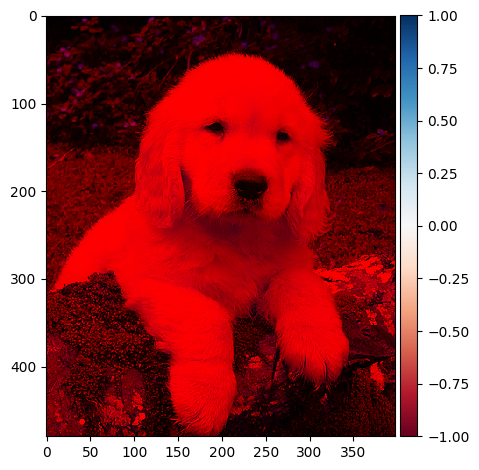

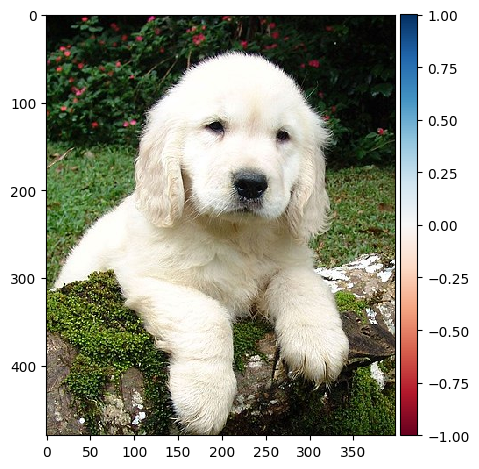

In [10]:
#Import libraries
from skimage import io
from skimage import color
#Read image
img = io.imread('puppy.jpg')
#Convert to YUV
img_yuv = color.rgb2yuv(img)
#Convert back to RGB
img_rgb = color.yuv2rgb(img_yuv)
#Show both figures
figure(0)
io.imshow(img_yuv)
figure(1)
io.imshow(img_rgb)

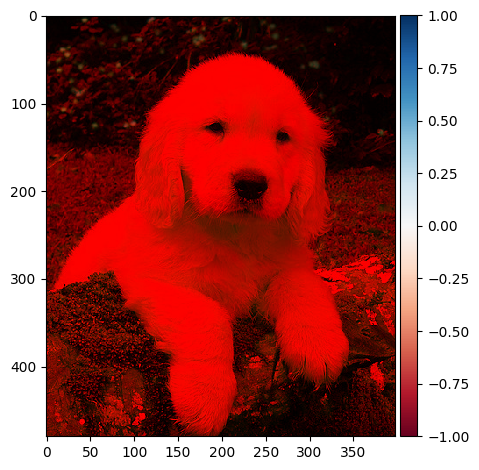

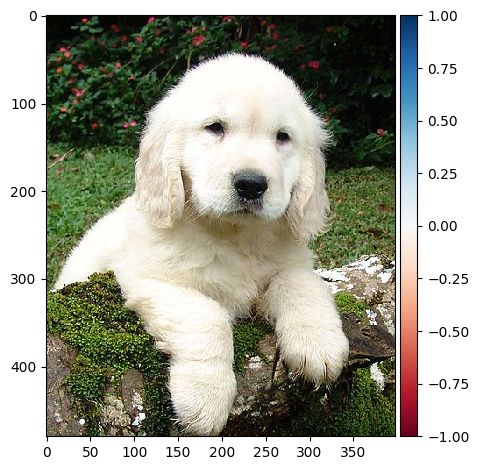

In [11]:
#Import libraries
from skimage import io
from skimage import color
#Read image
img = io.imread('puppy.jpg')
#Convert to YIQ
img_yiq = color.rgb2yiq(img)
#Convert back to RGB
img_rgb = color.yiq2rgb(img_yiq)
#Show both figures
figure(0)
io.imshow(img_yiq)
figure(1)
io.imshow(img_rgb)

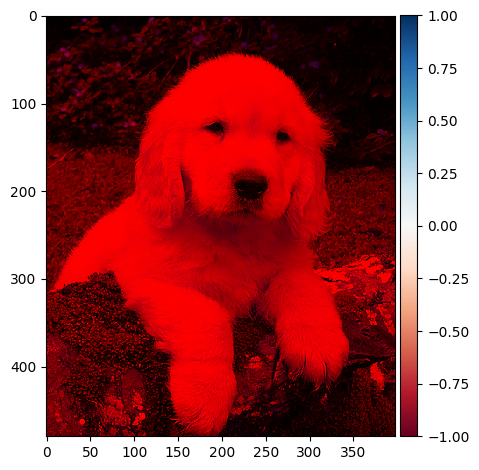

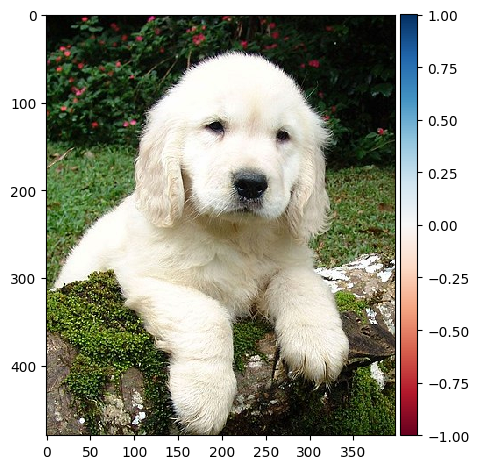

In [18]:
#Import libraries
from skimage import io
from skimage import color
#Read image
img = io.imread('puppy.jpg')
#Convert to YPbPr
img_ypbpr= color.rgb2ypbpr(img)
#Convert back to RGB
img_rgb= color.ypbpr2rgb(img_ypbpr)
#Show both figures
figure(0)
io.imshow(img_ypbpr)
figure(1)
io.imshow(img_rgb)

In [50]:
from skimage import img_as_ubyte

# Normalize YPbPr to the range [0, 1] before converting to uint8
img_ypbpr_normalized = (img_ypbpr - img_ypbpr.min()) / (img_ypbpr.max() - img_ypbpr.min())

# Convert to uint8 for saving
img_ypbpr_uint8 = img_as_ubyte(img_ypbpr_normalized)

# Save the normalized YPbPr image (this is only for visualization purposes)
io.imsave("puppy_ypbpr.jpg", img_ypbpr_uint8)


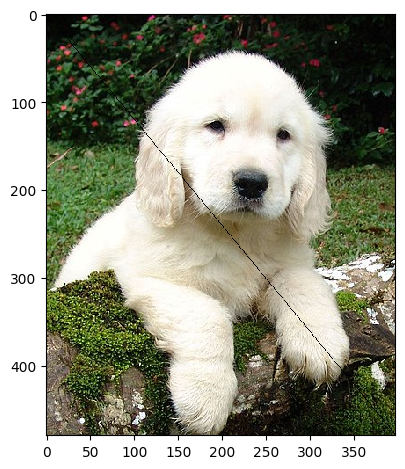

In [22]:
from skimage import io
from skimage import draw
img = io.imread('puppy.jpg')
x,y = draw.line(0,0,479,397)
img[x, y] = 0
io.imshow(img)

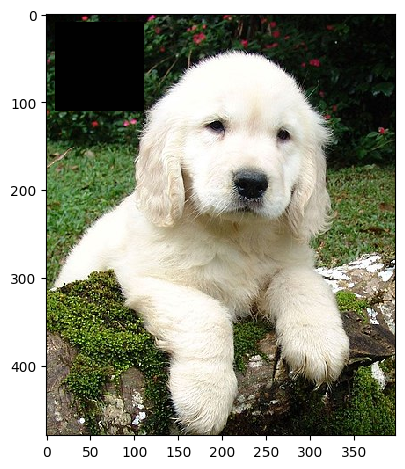

In [25]:
from skimage import io
from skimage import draw
img = io.imread('puppy.jpg')
def rectangle(x, y, w, h):
  rr, cc = [x, x + w, x + w, x], [y, y, y + h, y + h]
  return (draw.polygon(rr, cc))
rr, cc = rectangle(10, 10, 100,100)
img[rr, cc] = 1
io.imshow(img)

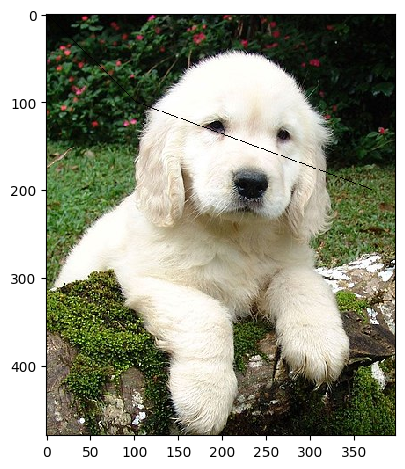

In [37]:
#Import libraries
from skimage import io
from skimage import draw
#Load image
img = io.imread('puppy.jpg')
#Define Bezier curve coordinates
x, y = draw.bezier_curve(0,0, 100, 100, 200,370,100)
#Draw Bezier curve
img[x, y] = 1
#Show image
io.imshow(img)

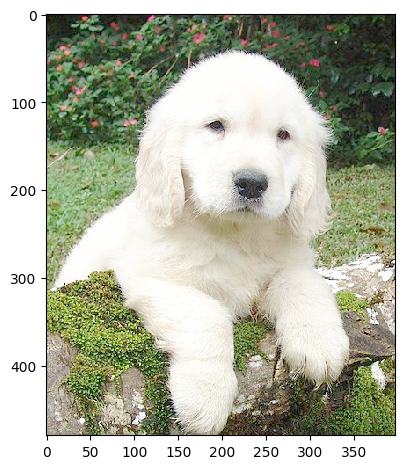

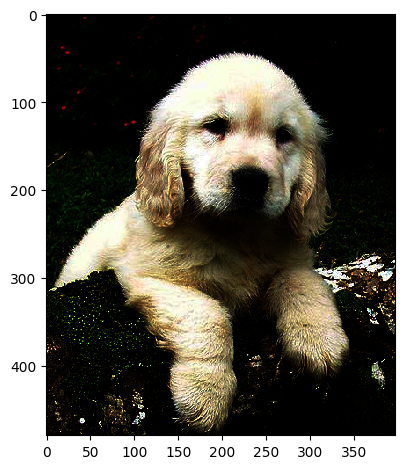

In [38]:
from skimage import exposure
from skimage import io
from pylab import *
img = io.imread('puppy.jpg')
gamma_corrected1 = exposure.adjust_gamma(img, 0.5)
gamma_corrected2 = exposure.adjust_gamma(img, 5)
figure(0)
io.imshow(gamma_corrected1)
figure(1)
io.imshow(gamma_corrected2)

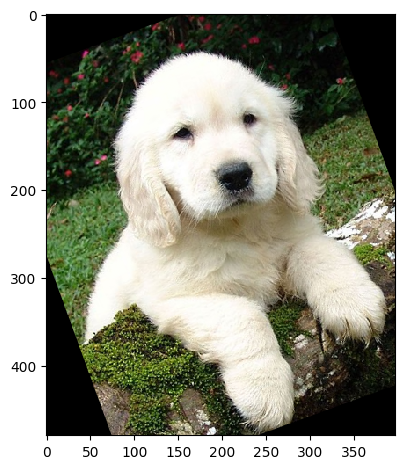

In [39]:
from skimage import io
from skimage.transform import rotate
img = io.imread('puppy.jpg')
img_rot = rotate(img, 20)
io.imshow(img_rot)

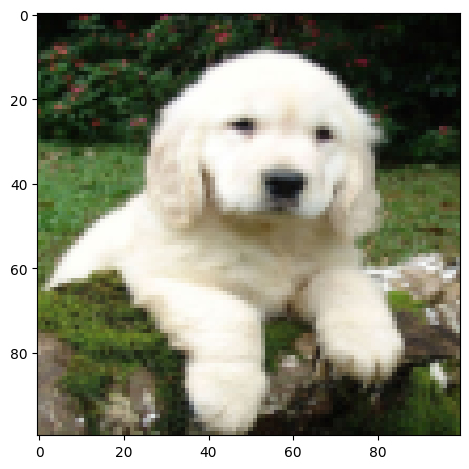

In [60]:
from skimage import io
from skimage.transform import resize
from skimage import img_as_ubyte

# Read the image
img = io.imread('puppy.jpg')

# Resize the image to 100x100
img_res = resize(img, (100, 100))

# Convert the resized image to uint8 format
img_res_uint8 = img_as_ubyte(img_res)

# Display the resized image
io.imshow(img_res_uint8)

# Save the resized image
io.imsave("ss.jpg", img_res_uint8)

In [59]:
from skimage import io
from skimage.metrics import structural_similarity as ssim
from skimage import img_as_ubyte

# Read images
img_original = io.imread('puppy.jpg')
img_modified = io.imread('puppy_ypbpr.jpg')

# Ensure both images are of the same data type (convert to uint8 if needed)
if img_original.dtype != 'uint8':
    img_original = img_as_ubyte(img_original)
if img_modified.dtype != 'uint8':
    img_modified = img_as_ubyte(img_modified)

# Compute SSIM between the same image (for reference)

ssim_original = ssim(img_original, img_original, data_range=img_original.max() - img_original.min(), win_size=3, multichannel=True)

# Compute SSIM between original and modified images
ssim_different = ssim(img_original, img_modified, data_range=img_original.max() - img_original.min(), win_size=3, multichannel=True)

print("SSIM (same image):", ssim_original)
print("SSIM (different images):", ssim_different)


SSIM (same image): 1.0
SSIM (different images): 0.1505093171840754
